# **Autism Prediction System with hyper parameter tuning:**

In [61]:
# Importing necessary libraries:

import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    make_scorer,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import pickle
import warnings
warnings.filterwarnings('ignore')

### **Loading the dataset and some basic exploration:**

In [2]:
# Loading the dataset and some EDA:

data = pd.read_csv("autism.csv")
print(data.columns)
print("*" * 50)
print(data.info())
print("*" * 50)
print(data.isnull().sum())
print("*" * 50)
print(data.shape)

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800

### **Fetching first 10 rows of data:**

In [3]:
data.head(10)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
5,6,1,0,0,0,0,1,0,0,1,...,m,Middle Eastern,no,no,Jordan,no,9.562117,18 and more,Self,0
6,7,1,0,0,0,0,0,1,1,1,...,f,Pasifika,no,no,United Kingdom,no,7.984569,18 and more,Self,0
7,8,1,1,1,1,1,1,1,0,1,...,m,Black,no,yes,United States,no,13.237898,18 and more,Self,1
8,9,1,1,1,1,0,0,0,1,1,...,m,White-European,no,no,Brazil,no,-1.755774,18 and more,Self,0
9,10,0,0,0,0,0,0,0,1,0,...,f,Others,yes,no,New Zealand,no,14.922570,18 and more,Self,0


### **Fetching the last 10 rows of data:**

In [4]:
data.tail(10) # Insight: There are some values with "?

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
790,791,1,0,1,1,1,1,1,0,1,...,m,Others,no,no,India,no,4.846236,18 and more,Self,0
791,792,0,0,0,1,1,1,0,0,0,...,m,Black,no,no,Australia,no,8.687281,18 and more,Self,0
792,793,1,0,0,0,0,0,0,0,0,...,m,?,no,no,Bolivia,no,9.403804,18 and more,Self,0
793,794,0,0,0,0,0,0,0,0,0,...,m,?,no,no,United Kingdom,no,9.777375,18 and more,Self,0
794,795,0,1,0,0,1,0,0,1,0,...,m,?,no,no,India,no,9.592719,18 and more,Self,0
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


### **Converting Age Column to Integer instead of Float:**

In [5]:
data['age'] = data['age'].astype(int)

In [6]:
data.head(2) # age converted successfully

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0


### **Checking the unique values in non-numerical columns:**

In [7]:
for col in data.columns:
  numerical_features = ['ID', 'age', 'result']
  if col not in numerical_features:
    print(f"{col} : {data[col].unique()}")
    print("*" * 50)

A1_Score : [1 0]
**************************************************
A2_Score : [0 1]
**************************************************
A3_Score : [1 0]
**************************************************
A4_Score : [0 1]
**************************************************
A5_Score : [1 0]
**************************************************
A6_Score : [0 1]
**************************************************
A7_Score : [1 0]
**************************************************
A8_Score : [0 1]
**************************************************
A9_Score : [1 0]
**************************************************
A10_Score : [1 0]
**************************************************
gender : ['f' 'm']
**************************************************
ethnicity : ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
**************************************************
jaundice : ['no' 'yes']
*******************************

### **Dropping Unneccessary Columns:**

In [8]:
# Dropping ID Column as it is not useful for prediction:
data.drop('ID', axis=1, inplace=True)
data = data.drop(columns=["age_desc"]) # Dropping age_desc as it is redundant.

### **Checking Unique Values of Countries:**

In [9]:
data['contry_of_res'].unique() # Insight: Some Countries are incorrectly spelled.

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

### **Fixing Incorrectly Spelled Countries:**

In [10]:
# Defining mapping dictionary from country names:

mapping = {
  "Viet Nam": "Vietnam",
  "AmericanSamoa": "USA",
  "Hong Kong": "China",
}

data['contry_of_res'] = data['contry_of_res'].replace(mapping)


In [11]:
data["contry_of_res"].unique() # Incorrectly spelled countries fixed.

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'USA', 'Bahamas', 'Saudi Arabia', 'Ireland',
       'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

### **Checking Target Class Distribution for Imbalanced Data:**

In [12]:
# Target Class Distribution:

data['Class/ASD'].value_counts() # Insights: the dataset is imbalanced

Class/ASD
0    639
1    161
Name: count, dtype: int64

### **Statistical Summary of Data:**

In [13]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


### **Univariate Analyis for Numerical Features (Age & Result):**

Mean Age: 27.96375
Median Age: 24.0
Skewness of Age: 1.1439643197930236


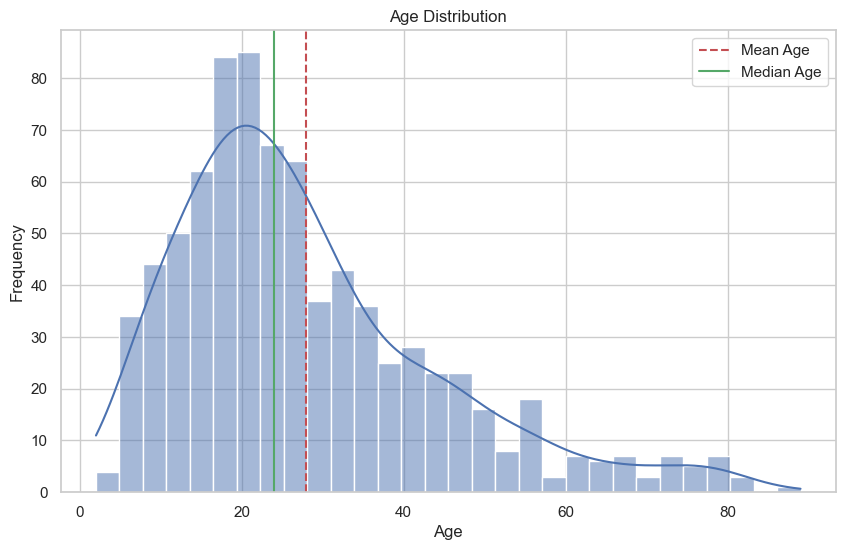

In [14]:
# Analysis of Age Feature:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Calculate the mean and median
mean_age = data['age'].mean()
median_age = data['age'].median()
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")

skewness = data['age'].skew()
print(f"Skewness of Age: {skewness}")

# Add vertical lines for mean and median
plt.axvline(mean_age, color='r', linestyle='--', label='Mean Age')
plt.axvline(median_age, color='g', linestyle='-', label='Median Age')
plt.legend()
plt.show() # rightly skewed data


Mean Result: 8.537303106501248
Median Result: 9.605299308
Skewness of Result: -0.6656783530250983


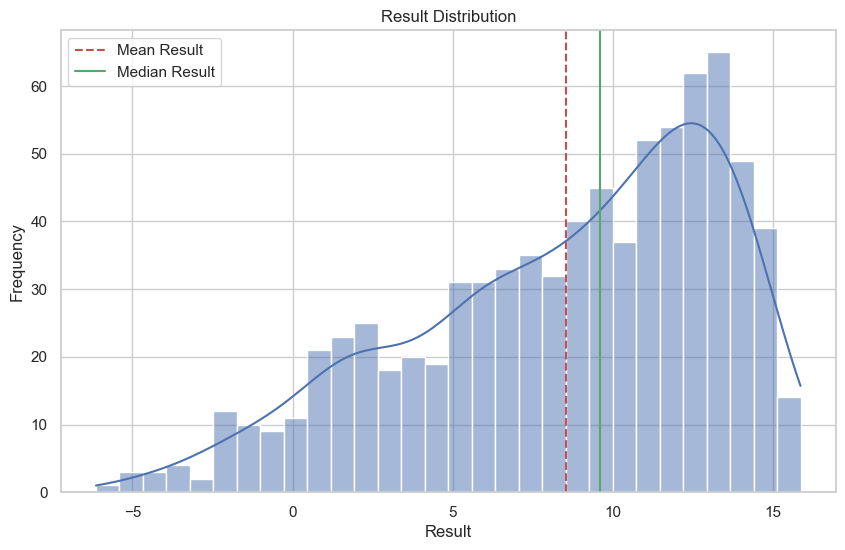

In [15]:
# Analysis for result column:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data["result"], bins=30, kde=True)
plt.title("Result Distribution")
plt.xlabel("Result")
plt.ylabel("Frequency")

# Calculating the mean and median
mean_result = data["result"].mean()
median_result = data["result"].median()
print(f"Mean Result: {mean_result}")
print(f"Median Result: {median_result}")

skewness = data["result"].skew()
print(f"Skewness of Result: {skewness}")

# Adding vertical lines for mean and median
plt.axvline(mean_result, color="r", linestyle="--", label="Mean Result")
plt.axvline(median_result, color="g", linestyle="-", label="Median Result")
plt.legend()
plt.show()  # left skewed data


# StandardScaler is used in case of normal distribution for models like linear regression, here we have skewed data but there is no issue with tree based models like random forest, decision tree, xgboost etc.

### **Detecting Outliers with Boxplots:**

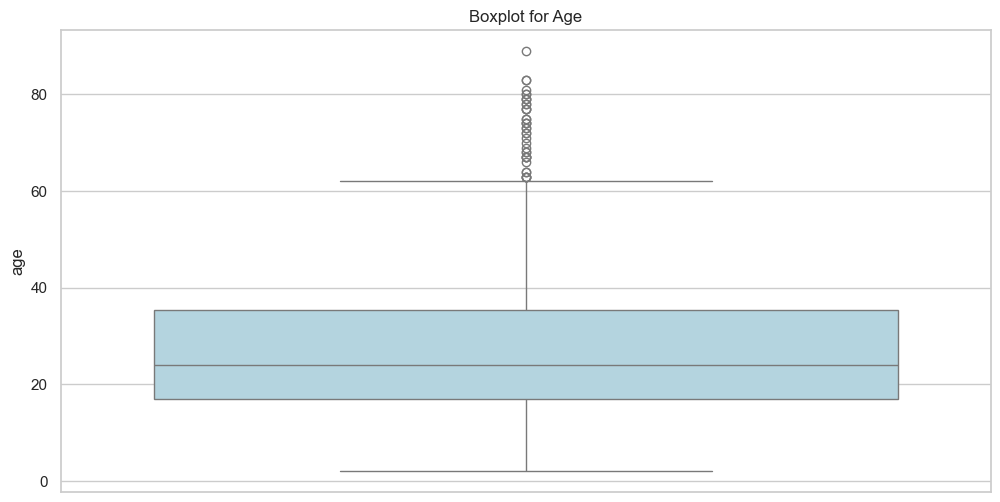

In [16]:
# Boxplots for age feature:

plt.figure(figsize=(12, 6))
sns.boxplot(data=data['age'], color='lightblue')
plt.title("Boxplot for Age")
plt.show()  # outliers are present in age column

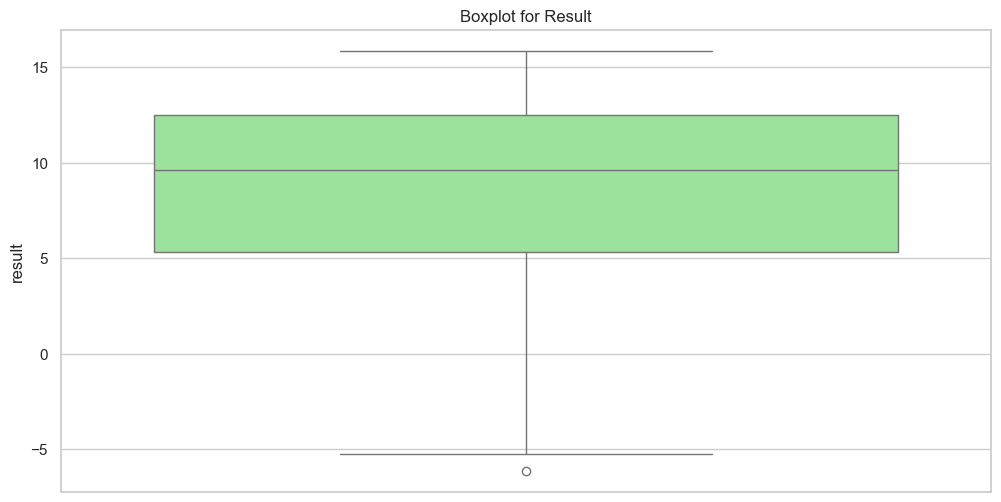

In [17]:
# Boxplots for result feature:

plt.figure(figsize=(12, 6))
sns.boxplot(data=data["result"], color="lightgreen")
plt.title("Boxplot for Result")
plt.show() # Result has only one outlier

### **Age Distribution by ASD Class:**

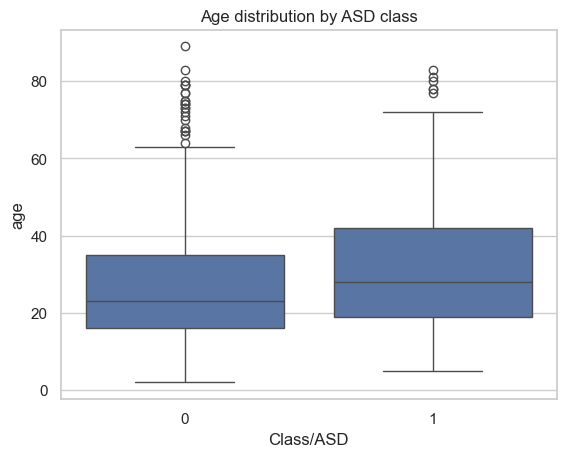

In [18]:
sns.boxplot(x="Class/ASD", y="age", data=data)
plt.title("Age distribution by ASD class")
plt.show()

# This boxplot shows the distribution of ages for individuals with and without ASD. Most outliers in the age feature (ages 60–75) are associated with the non-ASD class, while only a few high-age outliers (75–80) appear in the ASD group. This suggests that older age may be associated more with non-ASD, potentially contributing to model performance.

### **Interquartile Range Analysis for Outliers:**

In [19]:
# Identifying outliers in age column using IQR method:

Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]
print(f"Number of outliers in age column: {age_outliers.shape[0]}")

# Insight: There are 39 outliers in age column, we can replace outliers with median as mean is affected by outliers.


Number of outliers in age column: 39


In [20]:
# Identifying outliers in result column using IQR method:

Q1 = data["result"].quantile(0.25)
Q3 = data["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = data[(data["result"] < lower_bound) | (data["result"] > upper_bound)]
print(f"Number of outliers in result column: {result_outliers.shape[0]}")

# Insight: There is only one outlier in result column, we can replace outliers with median as mean is affected by outliers.

Number of outliers in result column: 1


In [21]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

### **Univariate Analysis for Categorical Columns**

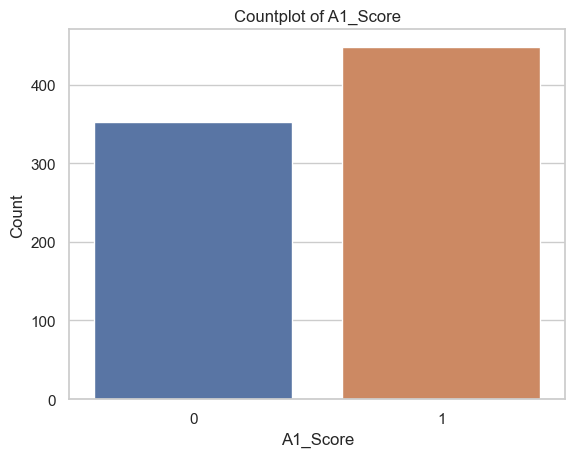

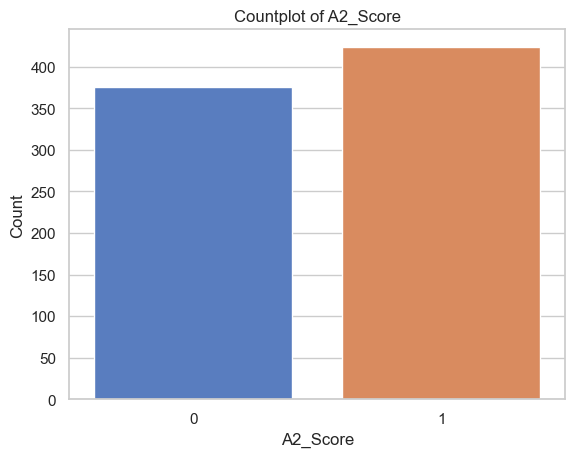

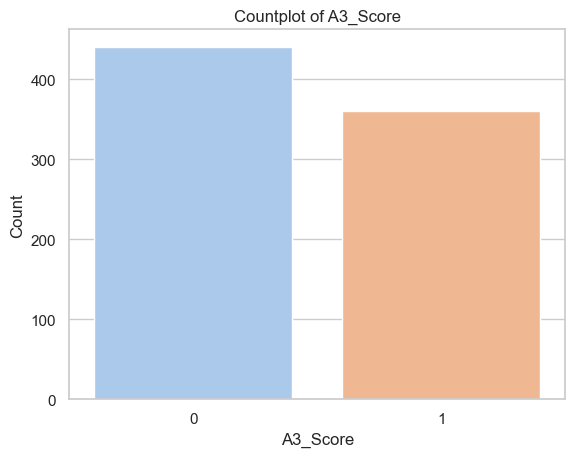

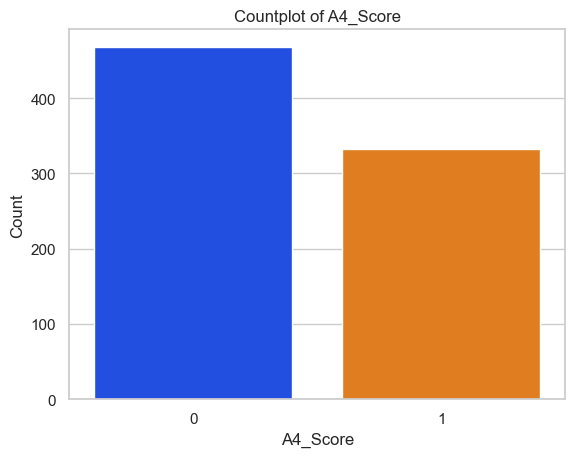

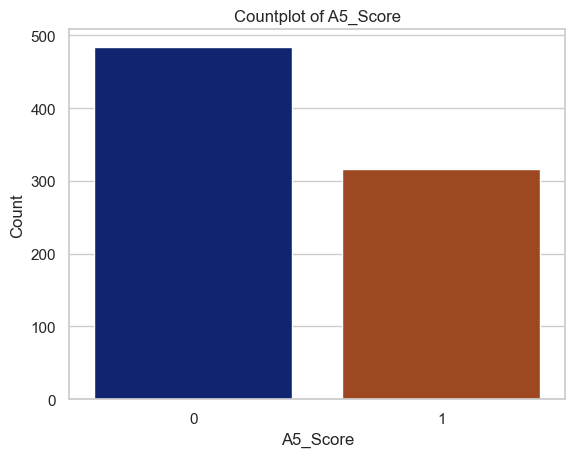

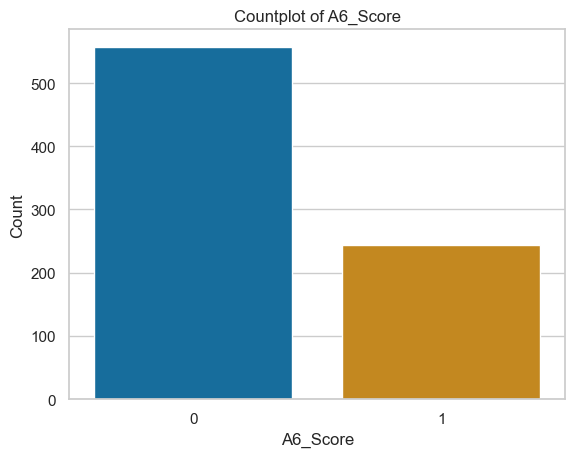

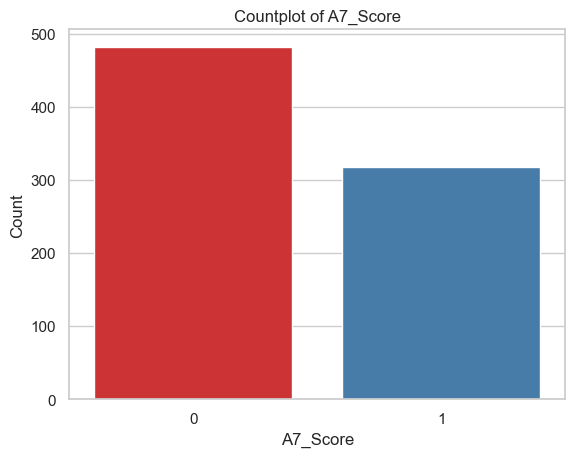

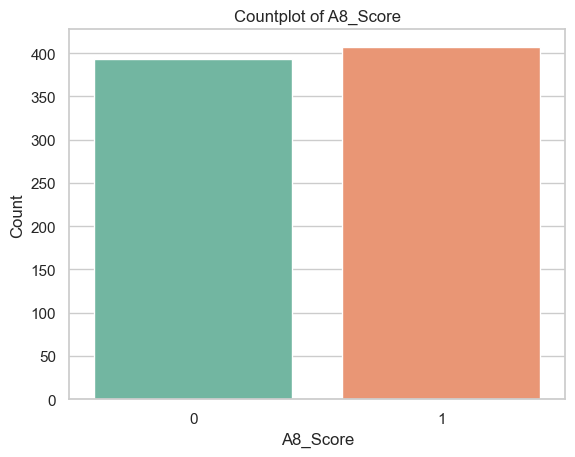

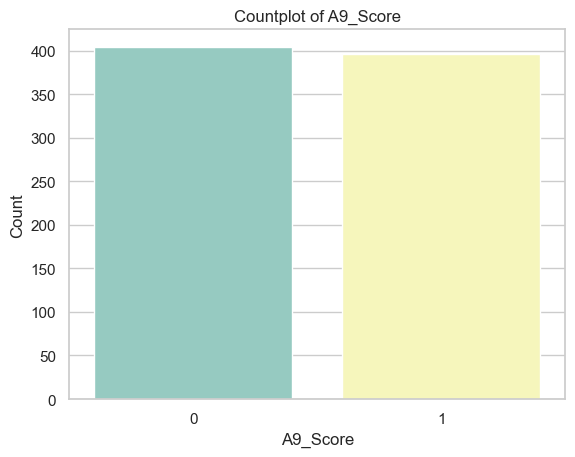

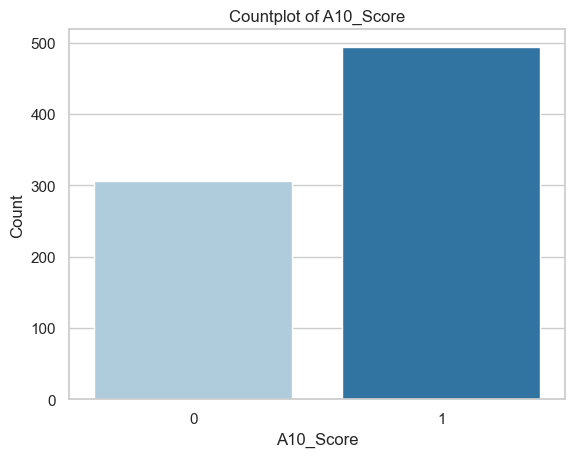

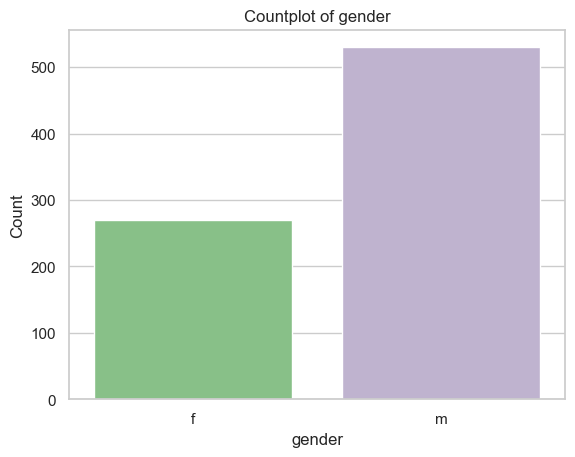

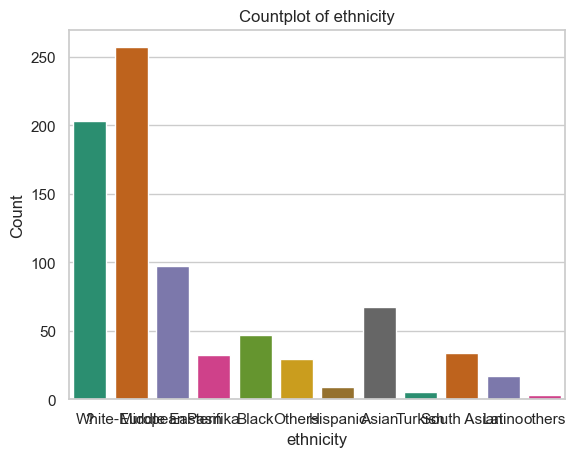

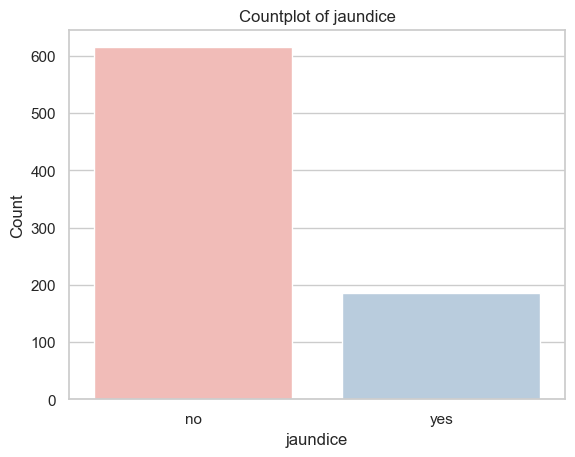

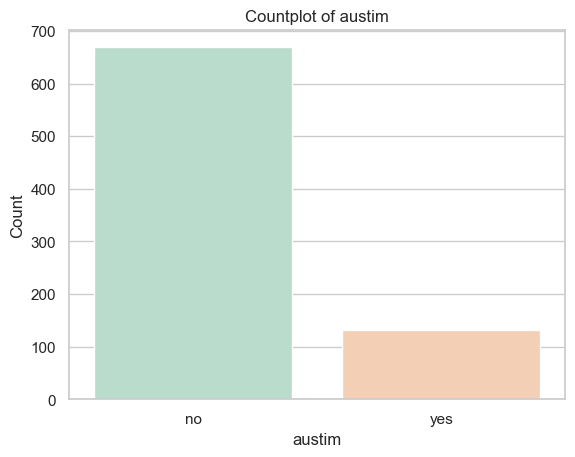

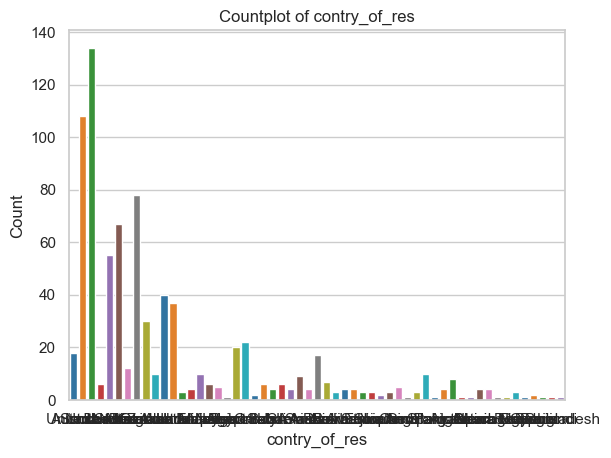

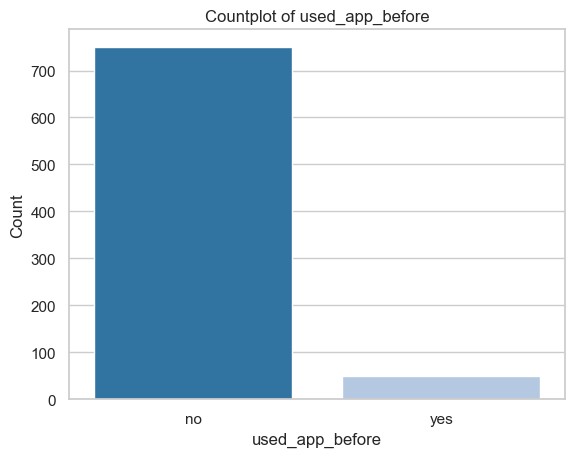

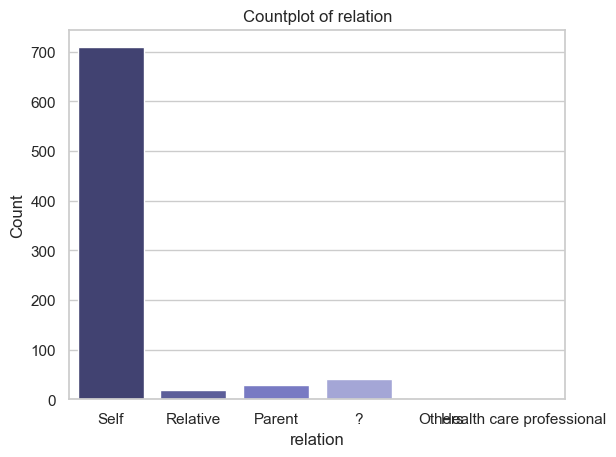

In [22]:
# Categorical Columns Analysis:

Categorical_Columns = [
    "A1_Score",
    "A2_Score",
    "A3_Score",
    "A4_Score",
    "A5_Score",
    "A6_Score",
    "A7_Score",
    "A8_Score",
    "A9_Score",
    "A10_Score",
    "gender",
    "ethnicity",
    "jaundice",
    "austim",
    "contry_of_res",
    "used_app_before",
    "relation",
]

palettes = [
    "deep",
    "muted",
    "pastel",
    "bright",
    "dark",
    "colorblind",
    "Set1",
    "Set2",
    "Set3",
    "Paired",
    "Accent",
    "Dark2",
    "Pastel1",
    "Pastel2",
    "tab10",
    "tab20",
    "tab20b",
    "tab20c",
]

for i, col in enumerate(Categorical_Columns):
    sns.countplot(x=data[col], palette=palettes[i % len(palettes)])
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

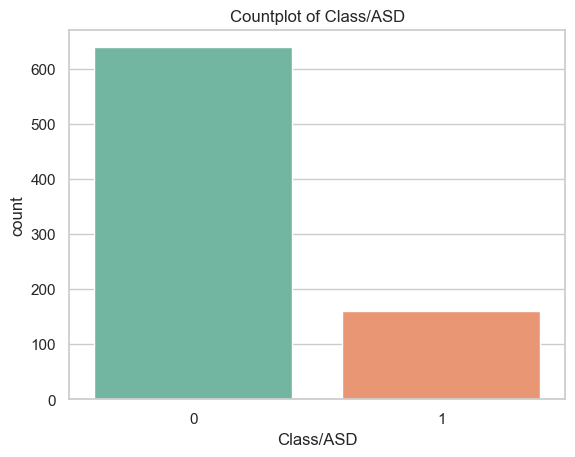

In [23]:
# Countplot for Target Class:

sns.countplot(
    x="Class/ASD", 
    data=data,
    palette="Set2",
)
plt.title("Countplot of Class/ASD")
plt.show()

### **Data Preprocessing: Label Encoding and Missing Values**

### Handling Missing Values:

In [24]:
# Checking for missing values represented by "?" i

num_question_marks = (data["ethnicity"] == "?").sum()
print(f"Number of '?' in ethnicity column: {num_question_marks}")

num_question_marks_2 = (data["relation"] == "?").sum()
print(f"Number of '?' in relation column: {num_question_marks_2}")



Number of '?' in ethnicity column: 203
Number of '?' in relation column: 40


In [25]:
data ["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [26]:
data["ethnicity"] =data["ethnicity"].replace({"?":"Others","others":"Others" })
data["relation"] =data["relation"].replace({"?":"Others" })

In [27]:
data["ethnicity"].value_counts() # Values Successfully replaced.

ethnicity
White-European     257
Others             235
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Latino              17
Hispanic             9
Turkish              5
Name: count, dtype: int64

In [28]:
data["relation"].value_counts() # Values Successfully replaced.

relation
Self                        709
Others                       42
Parent                       29
Relative                     18
Health care professional      2
Name: count, dtype: int64

### Label Encoding:

In [29]:
# Identifying cols with object datatypes:

object_cols = [col for col in data.columns if data[col].dtype == 'object']
print(object_cols)

['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']


In [30]:
# Initializing a dictionary to hold label encoders for each categorical columns:

Encoders = {}

for col in object_cols:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])
    Encoders[col] = label_encoder # SAving the encoder

# Save the encoders to pickle files:
with open("Encoders.pkl", "wb") as f:
   pickle.dump(Encoders, f)

In [31]:
Encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [32]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,4,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,4,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,53,0,14.851484,4,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,53,0,2.276617,4,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,4,0


### **Bivariate Analysis: Correlation Heatmap**

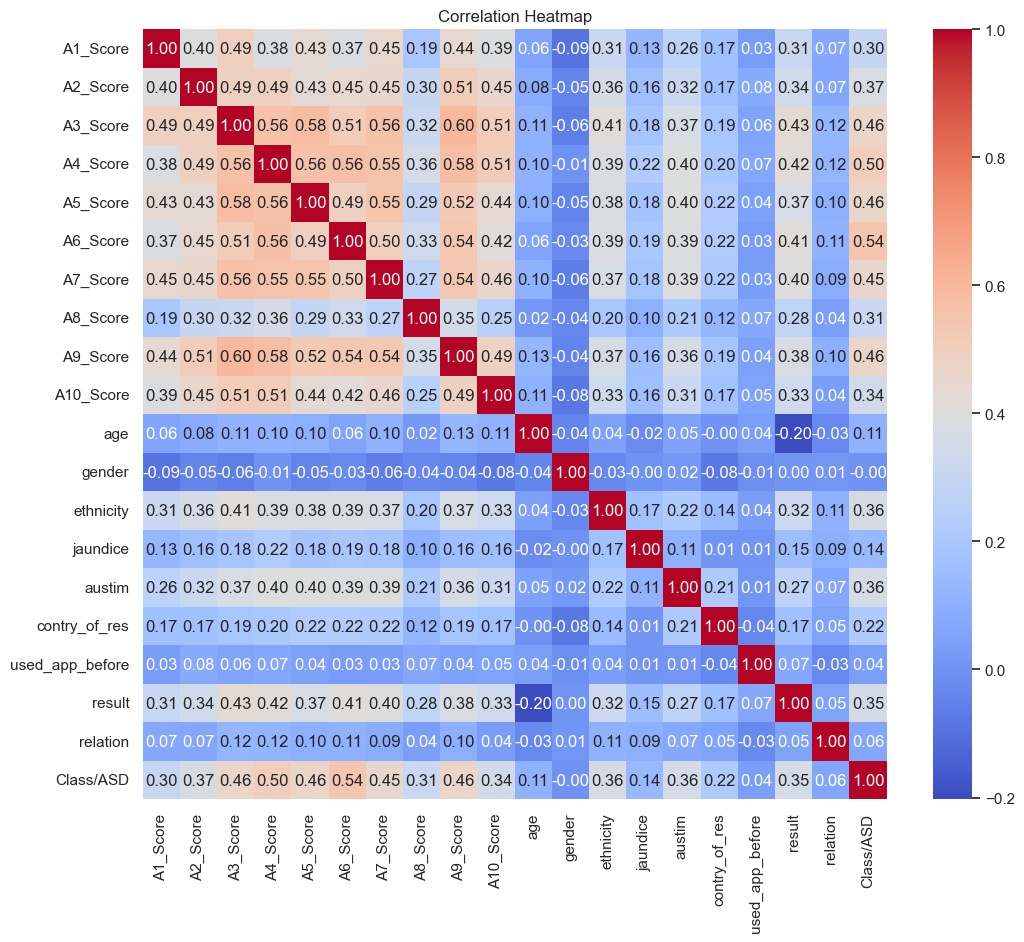

In [33]:
# Correlation Heatmap: used to remove highly correlated features if any

plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()  # No highly correlated features found.

### **Replacing Outliers with Median:**

In [34]:
# Function to replace outliers with median using IQR method:

def replace_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = data[column].median()
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = median_value
    return data

We have created data both with outliers replaced and not replaced for model comparison.

In [35]:
#  Making a clean copy of original data

data_with_outliers = data.copy()  # untouched version

In [36]:
# Creating another version with outliers replaced

data_outliers_replaced = data.copy()

# Replace outliers in 'age' and 'result' columns
columns_to_clean = ["age", "result"]
for col in columns_to_clean:
    data_outliers_replaced = replace_outliers_with_median(data_outliers_replaced, col)

### Splitting Data into Test Train Sets:

In [37]:
X1 = data_with_outliers.drop("Class/ASD", axis=1)
y1 = data_with_outliers["Class/ASD"]

X2 = data_outliers_replaced.drop("Class/ASD", axis=1)
y2 = data_outliers_replaced["Class/ASD"]

In [38]:
print(X1.shape)
print(X2.shape)

(800, 19)
(800, 19)


In [39]:
# Split original data
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

# Split cleaned data
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

In [40]:
y1_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [41]:
y1_test.value_counts() # for predicting

Class/ASD
0    124
1     36
Name: count, dtype: int64

### **Applying _SMOTE_ to Address Class Imbalance:**

In [42]:
smote = SMOTE(random_state= 42) # Taking training data and doind oversampling

# Applying SMOTE on the training data ONLY for original dataset
X1_train_resampled, y1_train_resampled = smote.fit_resample(X1_train, y1_train)

# Applying SMOTE on the training data ONLY for cleaned dataset
X2_train_resampled, y2_train_resampled = smote.fit_resample(X2_train, y2_train)

In [43]:
print(y1_train_resampled.shape)

(1030,)


In [44]:
print(y1_train_resampled.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


In [ ]:
models = {
  "Decision Tree": DecisionTreeClassifier(random_state=42),
  "Random Forest": RandomForestClassifier(random_state=42),
  "XGBoost": XGBClassifier( random_state=42)
}

### **Model Training:**

In [49]:
# Random Forest Classfier:

# Pipeline for original data
pipeline1 = Pipeline(
    [("smote", SMOTE(random_state=42)), ("rf", RandomForestClassifier(random_state=42))]
)

# 5-fold cross-validation on original training data
cv_scores1 = cross_val_score(pipeline1, X1_train, y1_train, cv=5, scoring="accuracy")
print(f"Cross-validation accuracy on ORIGINAL data: {cv_scores1}")
print(f"Mean CV accuracy: {cv_scores1.mean():.4f}")

# Fit on full resampled training data and evaluate on test
pipeline1.fit(X1_train, y1_train)
y1_pred = pipeline1.predict(X1_test)
print("Performance on ORIGINAL data:")
print(classification_report(y1_test, y1_pred))
print(f"Accuracy: {accuracy_score(y1_test, y1_pred):.2f}")

# Pipeline for cleaned data
pipeline2 = Pipeline(
    [("smote", SMOTE(random_state=42)), ("rf", RandomForestClassifier(random_state=42))]
)

cv_scores2 = cross_val_score(pipeline2, X2_train, y2_train, cv=5, scoring="accuracy")
print(f"\nCross-validation accuracy on OUTLIER-REPLACED data: {cv_scores2}")
print(f"Mean CV accuracy: {cv_scores2.mean():.4f}")

pipeline2.fit(X2_train, y2_train)
y2_pred = pipeline2.predict(X2_test)
print("\nPerformance on OUTLIER-REPLACED data:")
print(classification_report(y2_test, y2_pred))
print(f"Accuracy: {accuracy_score(y2_test, y2_pred):.2f}")

Cross-validation accuracy on ORIGINAL data: [0.8515625 0.84375   0.8046875 0.828125  0.8203125]
Mean CV accuracy: 0.8297
Performance on ORIGINAL data:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       124
           1       0.61      0.69      0.65        36

    accuracy                           0.83       160
   macro avg       0.76      0.78      0.77       160
weighted avg       0.84      0.83      0.83       160

Accuracy: 0.83

Cross-validation accuracy on OUTLIER-REPLACED data: [0.84375   0.8359375 0.8203125 0.8515625 0.8203125]
Mean CV accuracy: 0.8344

Performance on OUTLIER-REPLACED data:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       124
           1       0.64      0.78      0.70        36

    accuracy                           0.85       160
   macro avg       0.78      0.82      0.80       160
weighted avg       0.86      0.85      0.86       160

Accuracy: 0

In [46]:
# Decision Tree pipeline for original data
pipeline_dt1 = Pipeline(
    [("smote", SMOTE(random_state=42)), ("dt", DecisionTreeClassifier(random_state=42))]
)

cv_scores_dt1 = cross_val_score(
    pipeline_dt1, X1_train, y1_train, cv=5, scoring="accuracy"
)
print(f"Decision Tree CV accuracy on ORIGINAL data: {cv_scores_dt1}")
print(f"Mean CV accuracy: {cv_scores_dt1.mean():.4f}")

pipeline_dt1.fit(X1_train, y1_train)
y1_pred_dt = pipeline_dt1.predict(X1_test)
print("Decision Tree performance on ORIGINAL data:")
print(classification_report(y1_test, y1_pred_dt))
print(f"Accuracy: {accuracy_score(y1_test, y1_pred_dt):.2f}")

# Decision Tree pipeline for cleaned data
pipeline_dt2 = Pipeline(
    [("smote", SMOTE(random_state=42)), ("dt", DecisionTreeClassifier(random_state=42))]
)

cv_scores_dt2 = cross_val_score(
    pipeline_dt2, X2_train, y2_train, cv=5, scoring="accuracy"
)
print(f"\nDecision Tree CV accuracy on OUTLIER-REPLACED data: {cv_scores_dt2}")
print(f"Mean CV accuracy: {cv_scores_dt2.mean():.4f}")

pipeline_dt2.fit(X2_train, y2_train)
y2_pred_dt = pipeline_dt2.predict(X2_test)
print("\nDecision Tree performance on OUTLIER-REPLACED data:")
print(classification_report(y2_test, y2_pred_dt))
print(f"Accuracy: {accuracy_score(y2_test, y2_pred_dt):.2f}")

Decision Tree CV accuracy on ORIGINAL data: [0.8125   0.8125   0.75     0.828125 0.796875]
Mean CV accuracy: 0.8000
Decision Tree performance on ORIGINAL data:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       124
           1       0.54      0.53      0.54        36

    accuracy                           0.79       160
   macro avg       0.70      0.70      0.70       160
weighted avg       0.79      0.79      0.79       160

Accuracy: 0.79

Decision Tree CV accuracy on OUTLIER-REPLACED data: [0.84375  0.796875 0.78125  0.8125   0.765625]
Mean CV accuracy: 0.8000

Decision Tree performance on OUTLIER-REPLACED data:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       124
           1       0.46      0.47      0.47        36

    accuracy                           0.76       160
   macro avg       0.65      0.66      0.65       160
weighted avg       0.76      0.76      0.76     

In [ ]:
# XGBoost pipeline for original data
pipeline_xgb1 = Pipeline(
    [
        ("smote", SMOTE(random_state=42)),
        (
            "xgb",
            XGBClassifier(
                use_label_encoder=False, eval_metric="logloss", random_state=42
            ),
        ),
    ]
)

cv_scores_xgb1 = cross_val_score(
    pipeline_xgb1, X1_train, y1_train, cv=5, scoring="accuracy"
)
print(f"XGBoost CV accuracy on ORIGINAL data: {cv_scores_xgb1}")
print(f"Mean CV accuracy: {cv_scores_xgb1.mean():.4f}")

pipeline_xgb1.fit(X1_train, y1_train)
y1_pred_xgb = pipeline_xgb1.predict(X1_test)
print("XGBoost performance on ORIGINAL data:")
print(classification_report(y1_test, y1_pred_xgb))
print(f"Accuracy: {accuracy_score(y1_test, y1_pred_xgb):.2f}")

# XGBoost pipeline for cleaned data
pipeline_xgb2 = Pipeline(
    [
        ("smote", SMOTE(random_state=42)),
        (
            "xgb",
            XGBClassifier(
                use_label_encoder=False, eval_metric="logloss", random_state=42
            ),
        ),
    ]
)

cv_scores_xgb2 = cross_val_score(
    pipeline_xgb2, X2_train, y2_train, cv=5, scoring="accuracy"
)
print(f"\nXGBoost CV accuracy on OUTLIER-REPLACED data: {cv_scores_xgb2}")
print(f"Mean CV accuracy: {cv_scores_xgb2.mean():.4f}")

pipeline_xgb2.fit(X2_train, y2_train)
y2_pred_xgb = pipeline_xgb2.predict(X2_test)
print("\nXGBoost performance on OUTLIER-REPLACED data:")
print(classification_report(y2_test, y2_pred_xgb))
print(f"Accuracy: {accuracy_score(y2_test, y2_pred_xgb):.2f}")

XGBoost CV accuracy on ORIGINAL data: [0.8046875 0.8828125 0.8046875 0.8125    0.7734375]
Mean CV accuracy: 0.8156
XGBoost performance on ORIGINAL data:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       124
           1       0.56      0.61      0.59        36

    accuracy                           0.81       160
   macro avg       0.72      0.74      0.73       160
weighted avg       0.81      0.81      0.81       160

Accuracy: 0.81

XGBoost CV accuracy on OUTLIER-REPLACED data: [0.7890625 0.8515625 0.8125    0.8359375 0.8046875]
Mean CV accuracy: 0.8187

XGBoost performance on OUTLIER-REPLACED data:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       124
           1       0.61      0.69      0.65        36

    accuracy                           0.83       160
   macro avg       0.76      0.78      0.77       160
weighted avg       0.84      0.83      0.83       160

Accurac

## **Outputs with Default Parameters:**

| Model         | Dataset          | Mean CV Accuracy (%) | Test Accuracy (%) | Precision (ASD) (%) | Recall (ASD) (%) | F1-Score (ASD) (%) |
| ------------- | ---------------- | -------------------- | ----------------- | ------------------- | ---------------- | ------------------ |
| Random Forest | Original         | 82.97                | 83.13             | 61                  | 69               | 65                 |
| Random Forest | Outlier-Replaced | 83.44                | 85.00             | 64                  | 78               | 70                 |
| Decision Tree | Original         | 80.00                | 79.00             | 54                  | 53               | 54                 |
| Decision Tree | Outlier-Replaced | 80.00                | 76.00             | 46                  | 47               | 47                 |
| XGBoost       | Original         | 81.56                | 81.00             | 56                  | 61               | 59                 |
| XGBoost       | Outlier-Replaced | 81.87                | 83.00             | 61                  | 69               | 65                 |


## **Hyperparameter Tuning:** RandomizedSearchCV

In [64]:
# Custom scorer for minority class (ASD)
scorer = make_scorer(f1_score, pos_label=1)

# Decision Tree hyperparameter grid
param_grid_dt = {
    "dt__criterion": ["gini", "entropy"],
    "dt__max_depth": [None, 5, 10, 20],
    "dt__min_samples_split": [2, 5, 10],
    "dt__min_samples_leaf": [1, 2, 4],
}

# --- Original Data ---
search_dt_orig = RandomizedSearchCV(
    estimator=pipeline_dt1,
    param_distributions=param_grid_dt,
    n_iter=20,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
)
search_dt_orig.fit(X1_train, y1_train)
y1_pred_dt_best = search_dt_orig.predict(X1_test)

# Metrics for Original data
acc_dt_orig = accuracy_score(y1_test, y1_pred_dt_best)
prec_dt_orig = precision_score(y1_test, y1_pred_dt_best, pos_label=1)
rec_dt_orig = recall_score(y1_test, y1_pred_dt_best, pos_label=1)
f1_dt_orig = f1_score(y1_test, y1_pred_dt_best, pos_label=1)

print("=== Decision Tree - Original Data ===")
print("Best Hyperparameters:", search_dt_orig.best_params_)
print(f"Accuracy: {acc_dt_orig*100:.2f}%")
print(f"Precision (ASD): {prec_dt_orig*100:.2f}%")
print(f"Recall (ASD): {rec_dt_orig*100:.2f}%")
print(f"F1-score (ASD): {f1_dt_orig*100:.2f}%\n")

# --- Outlier-Replaced Data ---
search_dt_clean = RandomizedSearchCV(
    estimator=pipeline_dt2,
    param_distributions=param_grid_dt,
    n_iter=20,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
)
search_dt_clean.fit(X2_train, y2_train)
y2_pred_dt_best = search_dt_clean.predict(X2_test)

# Metrics for Outlier-Replaced data
acc_dt_clean = accuracy_score(y2_test, y2_pred_dt_best)
prec_dt_clean = precision_score(y2_test, y2_pred_dt_best, pos_label=1)
rec_dt_clean = recall_score(y2_test, y2_pred_dt_best, pos_label=1)
f1_dt_clean = f1_score(y2_test, y2_pred_dt_best, pos_label=1)

print("=== Decision Tree - Outlier-Replaced Data ===")
print("Best Hyperparameters:", search_dt_clean.best_params_)
print(f"Accuracy: {acc_dt_clean*100:.2f}%")
print(f"Precision (ASD): {prec_dt_clean*100:.2f}%")
print(f"Recall (ASD): {rec_dt_clean*100:.2f}%")
print(f"F1-score (ASD): {f1_dt_clean*100:.2f}%")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
=== Decision Tree - Original Data ===
Best Hyperparameters: {'dt__min_samples_split': 5, 'dt__min_samples_leaf': 1, 'dt__max_depth': 5, 'dt__criterion': 'gini'}
Accuracy: 78.12%
Precision (ASD): 51.06%
Recall (ASD): 66.67%
F1-score (ASD): 57.83%

Fitting 5 folds for each of 20 candidates, totalling 100 fits
=== Decision Tree - Outlier-Replaced Data ===
Best Hyperparameters: {'dt__min_samples_split': 2, 'dt__min_samples_leaf': 2, 'dt__max_depth': 5, 'dt__criterion': 'gini'}
Accuracy: 75.62%
Precision (ASD): 47.37%
Recall (ASD): 75.00%
F1-score (ASD): 58.06%


In [63]:
# Random Forest hyperparameter grid
param_grid_rf = {
    "rf__n_estimators": [100, 200, 300],
    "rf__criterion": ["gini", "entropy"],
    "rf__max_depth": [None, 5, 10, 20],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [1, 2, 4],
    "rf__bootstrap": [True, False],
}

# --- Original Data ---
search_rf_orig = RandomizedSearchCV(
    estimator=pipeline1,
    param_distributions=param_grid_rf,
    n_iter=20,
    scoring=scorer,  # F1-score for ASD
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
)
search_rf_orig.fit(X1_train, y1_train)
y1_pred_rf_best = search_rf_orig.predict(X1_test)

# Metrics for Original data
acc_rf_orig = accuracy_score(y1_test, y1_pred_rf_best)
prec_rf_orig = precision_score(y1_test, y1_pred_rf_best, pos_label=1)
rec_rf_orig = recall_score(y1_test, y1_pred_rf_best, pos_label=1)
f1_rf_orig = f1_score(y1_test, y1_pred_rf_best, pos_label=1)

print("=== Random Forest - Original Data ===")
print("Best Hyperparameters:", search_rf_orig.best_params_)
print(f"Accuracy: {acc_rf_orig*100:.2f}%")
print(f"Precision (ASD): {prec_rf_orig*100:.2f}%")
print(f"Recall (ASD): {rec_rf_orig*100:.2f}%")
print(f"F1-score (ASD): {f1_rf_orig*100:.2f}%\n")

# --- Outlier-Replaced Data ---
search_rf_clean = RandomizedSearchCV(
    estimator=pipeline2,
    param_distributions=param_grid_rf,
    n_iter=20,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
)
search_rf_clean.fit(X2_train, y2_train)
y2_pred_rf_best = search_rf_clean.predict(X2_test)

# Metrics for Outlier-Replaced data
acc_rf_clean = accuracy_score(y2_test, y2_pred_rf_best)
prec_rf_clean = precision_score(y2_test, y2_pred_rf_best, pos_label=1)
rec_rf_clean = recall_score(y2_test, y2_pred_rf_best, pos_label=1)
f1_rf_clean = f1_score(y2_test, y2_pred_rf_best, pos_label=1)

print("=== Random Forest - Outlier-Replaced Data ===")
print("Best Hyperparameters:", search_rf_clean.best_params_)
print(f"Accuracy: {acc_rf_clean*100:.2f}%")
print(f"Precision (ASD): {prec_rf_clean*100:.2f}%")
print(f"Recall (ASD): {rec_rf_clean*100:.2f}%")
print(f"F1-score (ASD): {f1_rf_clean*100:.2f}%")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
=== Random Forest - Original Data ===
Best Hyperparameters: {'rf__n_estimators': 200, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 2, 'rf__max_depth': 5, 'rf__criterion': 'entropy', 'rf__bootstrap': True}
Accuracy: 85.00%
Precision (ASD): 61.11%
Recall (ASD): 91.67%
F1-score (ASD): 73.33%

Fitting 5 folds for each of 20 candidates, totalling 100 fits
=== Random Forest - Outlier-Replaced Data ===
Best Hyperparameters: {'rf__n_estimators': 100, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 2, 'rf__max_depth': 5, 'rf__criterion': 'gini', 'rf__bootstrap': True}
Accuracy: 83.75%
Precision (ASD): 58.93%
Recall (ASD): 91.67%
F1-score (ASD): 71.74%


In [62]:
# XGBoost hyperparameter grid
param_grid_xgb = {
    "xgb__n_estimators": [100, 200, 300],
    "xgb__learning_rate": [0.01, 0.1, 0.2],
    "xgb__max_depth": [3, 5, 7],
    "xgb__subsample": [0.6, 0.8, 1.0],
    "xgb__colsample_bytree": [0.6, 0.8, 1.0],
}

# --- Original data ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Original Data ---
search_xgb_orig = RandomizedSearchCV(
    estimator=pipeline_xgb1,
    param_distributions=param_grid_xgb,
    n_iter=20,
    scoring=scorer,  # F1-score for ASD
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
)
search_xgb_orig.fit(X1_train, y1_train)
y1_pred_xgb_best = search_xgb_orig.predict(X1_test)

# Metrics
acc_orig = accuracy_score(y1_test, y1_pred_xgb_best)
prec_orig = precision_score(y1_test, y1_pred_xgb_best, pos_label=1)
rec_orig = recall_score(y1_test, y1_pred_xgb_best, pos_label=1)
f1_orig = f1_score(y1_test, y1_pred_xgb_best, pos_label=1)

print("=== XGBoost - Original Data ===")
print("Best Hyperparameters:", search_xgb_orig.best_params_)
print(f"Accuracy: {acc_orig*100:.2f}%")
print(f"Precision (ASD): {prec_orig*100:.2f}%")
print(f"Recall (ASD): {rec_orig*100:.2f}%")
print(f"F1-score (ASD): {f1_orig*100:.2f}%\n")

# --- Outlier-Replaced Data ---
search_xgb_clean = RandomizedSearchCV(
    estimator=pipeline_xgb2,
    param_distributions=param_grid_xgb,
    n_iter=20,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
)
search_xgb_clean.fit(X2_train, y2_train)
y2_pred_xgb_best = search_xgb_clean.predict(X2_test)

# Metrics
acc_clean = accuracy_score(y2_test, y2_pred_xgb_best)
prec_clean = precision_score(y2_test, y2_pred_xgb_best, pos_label=1)
rec_clean = recall_score(y2_test, y2_pred_xgb_best, pos_label=1)
f1_clean = f1_score(y2_test, y2_pred_xgb_best, pos_label=1)

print("=== XGBoost - Outlier-Replaced Data ===")
print("Best Hyperparameters:", search_xgb_clean.best_params_)
print(f"Accuracy: {acc_clean*100:.2f}%")
print(f"Precision (ASD): {prec_clean*100:.2f}%")
print(f"Recall (ASD): {rec_clean*100:.2f}%")
print(f"F1-score (ASD): {f1_clean*100:.2f}%")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
=== XGBoost - Original Data ===
Best Hyperparameters: {'xgb__subsample': 0.6, 'xgb__n_estimators': 300, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.01, 'xgb__colsample_bytree': 0.6}
Accuracy: 83.12%
Precision (ASD): 58.49%
Recall (ASD): 86.11%
F1-score (ASD): 69.66%

Fitting 5 folds for each of 20 candidates, totalling 100 fits
=== XGBoost - Outlier-Replaced Data ===
Best Hyperparameters: {'xgb__subsample': 0.6, 'xgb__n_estimators': 300, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.01, 'xgb__colsample_bytree': 0.6}
Accuracy: 81.25%
Precision (ASD): 55.56%
Recall (ASD): 83.33%
F1-score (ASD): 66.67%


## **Outputs with Hyperparameter Tuning:**

| Model         | Dataset          | Accuracy (%) | Precision (ASD) (%) | Recall (ASD) (%) | F1-score (ASD) (%) | Best Hyperparameters                                                                                                    |
| ------------- | ---------------- | ------------ | ------------------- | ---------------- | ------------------ | ----------------------------------------------------------------------------------------------------------------------- |
| Decision Tree | Original         | 78.12        | 51.06               | 66.67            | 57.83              | `min_samples_split=5`, `min_samples_leaf=1`, `max_depth=5`, `criterion='gini'`                                          |
| Decision Tree | Outlier-Replaced | 75.62        | 47.37               | 75.00            | 58.06              | `min_samples_split=2`, `min_samples_leaf=2`, `max_depth=5`, `criterion='gini'`                                          |
| Random Forest | Original         | 85.00        | 61.11               | 91.67            | 73.33              | `n_estimators=200`, `min_samples_split=5`, `min_samples_leaf=2`, `max_depth=5`, `criterion='entropy'`, `bootstrap=True` |
| Random Forest | Outlier-Replaced | 83.75        | 58.93               | 91.67            | 71.74              | `n_estimators=100`, `min_samples_split=5`, `min_samples_leaf=2`, `max_depth=5`, `criterion='gini'`, `bootstrap=True`    |
| XGBoost       | Original         | 83.12        | 58.49               | 86.11            | 69.66              | `subsample=0.6`, `n_estimators=300`, `max_depth=5`, `learning_rate=0.01`, `colsample_bytree=0.6`                        |
| XGBoost       | Outlier-Replaced | 81.25        | 55.56               | 83.33            | 66.67              | `subsample=0.6`, `n_estimators=300`, `max_depth=5`, `learning_rate=0.01`, `colsample_bytree=0.6`                        |
